In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df=pd.read_csv("zomato.csv", encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [12]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [13]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [16]:
local_name=df.Locality.value_counts().index
local_val=df.Locality.value_counts().values


([<matplotlib.patches.Wedge at 0x2babba59570>,
 [Text(0.9991203655099928, 0.4601722451682397, 'Connaught Place'),
  Text(0.38474210036716133, 1.0305209926076544, 'Rajouri Garden'),
  Text(-0.32582401454474796, 1.050637288290276, 'Shahdara'),
  Text(-0.8703141347024715, 0.6727208239211033, 'Defence Colony'),
  Text(-1.0984514781151833, 0.05834680990910352, 'Malviya Nagar'),
  Text(-0.9387165856946939, -0.5734205888714641, 'Pitampura'),
  Text(-0.4530913540453708, -1.0023513480258968, 'Mayur Vihar Phase 1'),
  Text(0.17438376636990302, -1.0860894539708261, 'Rajinder Nagar'),
  Text(0.7325666148603296, -0.8205767208446006, 'Safdarjung'),
  Text(1.0573163253689466, -0.30345047060156, 'Satyaniketan')])

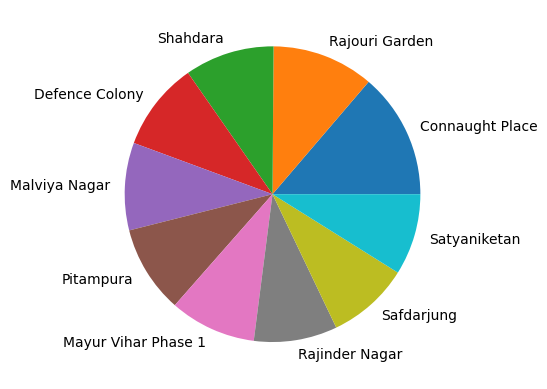

In [17]:
plt.pie(local_val[:10],labels=local_name[:10])

In [18]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [19]:
rate=df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns={0:'rating count'})

In [20]:
rate

,Aggregate rating,Rating color,Rating text,rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='rating count'>

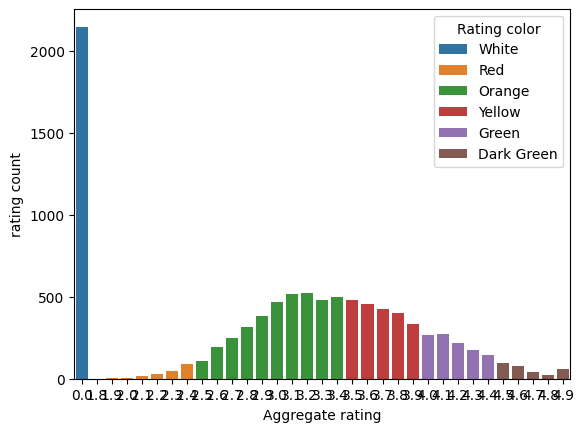

In [28]:
import matplotlib 
sns.barplot(data=rate,x="Aggregate rating", y="rating count",hue="Rating color")



In [33]:

zero_rating_places=df[df['Rating color']=='White'].groupby('Locality').size().reset_index()
zero_rating_places.head()

,Locality,0
0,Aaya Nagar,1
1,Aerocity,2
2,Alaknanda,8
3,Anand Vihar,15
4,"Ansal Plaza Mall, Greater Noida",1


In [40]:
online_delivery=df[df['Has Online delivery']=='Yes'].Locality.value_counts()
online_delivery.head()

Locality
Malviya Nagar      65
Connaught Place    52
Sector 18          51
Defence Colony     49
DLF Phase 3        46
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2bac243aa70>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

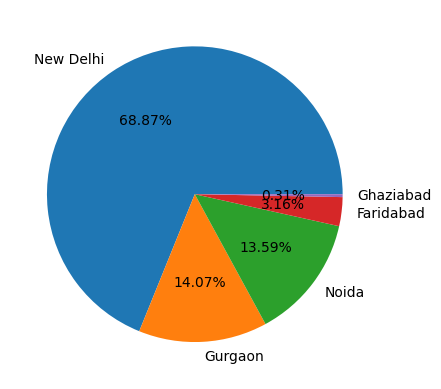

In [42]:
city_values=df.City.value_counts().values
city_labels=df.City.value_counts().index 
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2F%%')